# **$\color{Green}{\text{Disruptive Technology 1}}$**
# **Safal Fasal--Notebook**

# **Group** : -  1

### **Section/Group** :- 22AML-107 / A
# **Efforts By :**






*   Anushka Rakesh (22BAI70009)
*   Samudragupta Barma(22BAI70020)

*   Aditya Berry(22BAI70022)
*   Tanushi Aggarwal(22BAI70034)


*  Chaitanya Narang(22BAI70049)


In [ ]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")
from pandas import *
from numpy import *
import matplotlib.pyplot as plt

Pycaret installed sucessfully!!


In [ ]:
dataset =read_csv("/content/drive/MyDrive/data.csv")
dataset.head(10)

,Rainfall,Temperature,Ph,Production
0,1000.49920,35.00000,5.5,0.03994
1,1001.68519,35.00000,5.5,0.13481
2,1001.95313,34.00000,5.5,0.15625
3,1002.18254,33.66667,5.5,0.17460
4,1002.37279,33.16667,5.5,0.18982
5,1002.44845,32.66667,5.5,0.19588
6,1002.54647,32.16667,5.5,0.20372
7,1002.67319,31.66667,5.5,0.21386
8,1002.85204,31.16667,5.5,0.22816
9,1002.93563,30.66667,5.5,0.23485


# $\color{Green}{\text{Exploratory Data Analysis}}$

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rainfall     1523 non-null   float64
 1   Temperature  1523 non-null   float64
 2   Ph           1523 non-null   float64
 3   Production   1523 non-null   float64
dtypes: float64(4)
memory usage: 47.7 KB


In [ ]:
dataset.columns

Index(['Rainfall', 'Temperature', 'Ph', 'Production'], dtype='object')

In [ ]:
dataset.describe()

,Rainfall,Temperature,Ph,Production
count,1523.000000,1523.000000,1523.000000,1523.000000
mean,1027.102072,18.976472,5.897045,2.162630
std,33.114394,5.051640,0.187024,2.633592
min,1000.499200,11.000000,5.500000,0.039940
25%,1010.000000,17.000000,5.800000,0.782910
50%,1015.039060,17.000000,5.800000,1.203130
75%,1024.082230,21.000000,6.000000,1.926580
max,1241.250000,39.000000,6.500000,19.300000


In [ ]:
print("dataset.shape -->", dataset.shape)
print("Rows     -->", dataset.shape[0])  ##axis 0---row
print("Columns  -->", dataset.shape[1])   ###column

dataset.shape --> (1523, 4)
Rows     --> 1523
Columns  --> 4


In [ ]:
dataset.isnull().sum()

Rainfall       0
Temperature    0
Ph             0
Production     0
dtype: int64

In [ ]:
dataset.fillna(0) 

,Rainfall,Temperature,Ph,Production
0,1000.49920,35.00000,5.5,0.03994
1,1001.68519,35.00000,5.5,0.13481
2,1001.95313,34.00000,5.5,0.15625
3,1002.18254,33.66667,5.5,0.17460
4,1002.37279,33.16667,5.5,0.18982
...,...,...,...,...
1518,1137.50000,39.00000,5.8,11.00000
1519,1138.75000,39.00000,5.8,11.10000
1520,1138.97059,39.00000,5.8,11.11765
1521,1144.65881,35.00000,5.8,11.12760


In [ ]:
print(dataset)

        Rainfall  Temperature   Ph  Production
0     1000.49920     35.00000  5.5     0.03994
1     1001.68519     35.00000  5.5     0.13481
2     1001.95313     34.00000  5.5     0.15625
3     1002.18254     33.66667  5.5     0.17460
4     1002.37279     33.16667  5.5     0.18982
...          ...          ...  ...         ...
1518  1137.50000     39.00000  5.8    11.00000
1519  1138.75000     39.00000  5.8    11.10000
1520  1138.97059     39.00000  5.8    11.11765
1521  1144.65881     35.00000  5.8    11.12760
1522  1144.79310     35.00000  5.8    11.13793

[1523 rows x 4 columns]


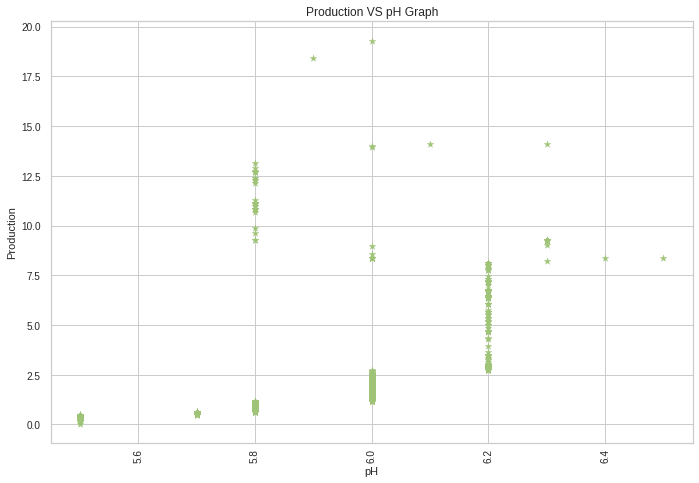

In [ ]:
x = dataset['Ph']
y = dataset['Production']

fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
 
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
plt.xlabel('pH')                                   
plt.ylabel('Production')
plt.title('Production VS pH Graph')
plt.xticks(rotation=90)
plt.scatter(x, y, marker = "*",color = "g")

plt.show()

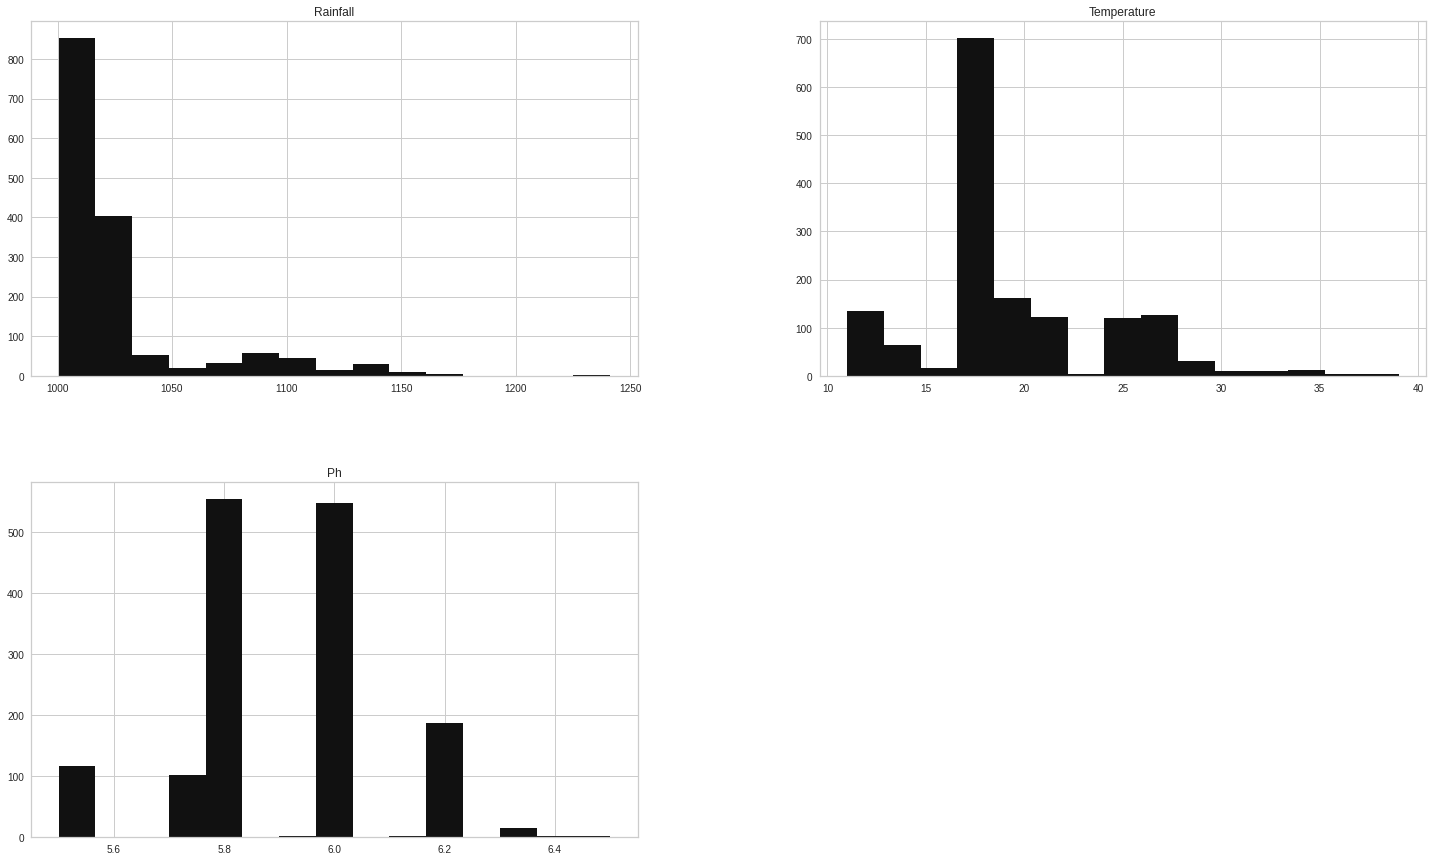

In [ ]:
dataset.columns = ['Rainfall', 'Temperature', 'Ph', 'Production']
color = 'k'
data = dataset.copy()
data.drop('Production', axis = 1, inplace = True)
data.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 16
plt.show()

In [ ]:
from pycaret.regression import * 
s = setup(dataset, target = 'Production',silent=True )

,Description,Value
0,session_id,1027
1,Target,Production
2,Original Data,"(1523, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1066, 3)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='Production', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [ ]:
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0182,0.0025,0.0478,0.9997,0.0124,0.0132,0.354
lar,Least Angle Regression,0.0182,0.0025,0.0478,0.9997,0.0124,0.0132,0.015
omp,Orthogonal Matching Pursuit,0.0171,0.0026,0.0485,0.9997,0.0110,0.0097,0.014
br,Bayesian Ridge,0.0181,0.0025,0.0478,0.9997,0.0123,0.0129,0.012
gbr,Gradient Boosting Regressor,0.0157,0.0024,0.0418,0.9997,0.0084,0.0136,0.078
ridge,Ridge Regression,0.0180,0.0025,0.0478,0.9997,0.0122,0.0128,0.012
lasso,Lasso Regression,0.0322,0.0034,0.0579,0.9996,0.0142,0.0226,0.013
en,Elastic Net,0.0251,0.0029,0.0521,0.9996,0.0123,0.0166,0.015
dt,Decision Tree Regressor,0.0109,0.0044,0.0497,0.9995,0.0077,0.0074,0.017
et,Extra Trees Regressor,0.0072,0.0047,0.0489,0.9995,0.0082,0.0175,0.233


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:compare_models() succesfully completed......................................


### **Model Performance using data "Normalization"**
---

In [ ]:
s = setup(data=dataset, target='Production', normalize = True, normalize_method = 'minmax', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0201,0.0025,0.0486,0.9996,0.0153,0.0165,0.015
lar,Least Angle Regression,0.0201,0.0025,0.0486,0.9996,0.0153,0.0165,0.015
omp,Orthogonal Matching Pursuit,0.0176,0.0027,0.0502,0.9996,0.0136,0.0110,0.014
br,Bayesian Ridge,0.0201,0.0025,0.0486,0.9996,0.0153,0.0165,0.019
huber,Huber Regressor,0.0091,0.0031,0.0524,0.9995,0.0135,0.0066,0.044
gbr,Gradient Boosting Regressor,0.0183,0.0247,0.0787,0.9972,0.0102,0.0129,0.080
et,Extra Trees Regressor,0.0091,0.0253,0.0747,0.9970,0.0064,0.0045,0.267
rf,Random Forest Regressor,0.0124,0.0281,0.0819,0.9968,0.0077,0.0061,0.315
dt,Decision Tree Regressor,0.0138,0.0372,0.0931,0.9958,0.0089,0.0061,0.019
ridge,Ridge Regression,0.1227,0.0377,0.1869,0.9946,0.0750,0.1492,0.016


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:compare_models() succesfully completed......................................


### **Model Performance using "Feature Selection"**
---

In [ ]:
s = setup(data = dataset, target = 'Production', feature_selection = True, feature_selection_threshold = 0.9, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0055,0.0029,0.0353,0.9997,0.0056,0.0052,0.244
omp,Orthogonal Matching Pursuit,0.0155,0.0025,0.0483,0.9996,0.0149,0.0099,0.016
lr,Linear Regression,0.0152,0.0025,0.0483,0.9996,0.0150,0.0106,0.015
dt,Decision Tree Regressor,0.0110,0.0038,0.0486,0.9996,0.0071,0.0065,0.019
br,Bayesian Ridge,0.0152,0.0025,0.0483,0.9996,0.0150,0.0106,0.014
gbr,Gradient Boosting Regressor,0.0172,0.0032,0.0483,0.9996,0.0088,0.0130,0.077
lar,Least Angle Regression,0.0152,0.0025,0.0483,0.9996,0.0150,0.0106,0.018
en,Elastic Net,0.0232,0.0028,0.0517,0.9996,0.0158,0.0166,0.015
ridge,Ridge Regression,0.0152,0.0025,0.0483,0.9996,0.0150,0.0106,0.014
lasso,Lasso Regression,0.0306,0.0034,0.0578,0.9995,0.0174,0.0228,0.016


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=833, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


### **Model Performance using "Outlier Removal"**
---

In [ ]:
s = setup(data = dataset, target = 'Production', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0014,0.0001,0.0074,1.0000,0.0021,0.0012,0.243
br,Bayesian Ridge,0.0049,0.0005,0.0212,0.9998,0.0126,0.0075,0.017
lr,Linear Regression,0.0049,0.0005,0.0212,0.9998,0.0126,0.0075,0.015
rf,Random Forest Regressor,0.0055,0.0007,0.0230,0.9998,0.0042,0.0026,0.314
dt,Decision Tree Regressor,0.0051,0.0007,0.0218,0.9998,0.0042,0.0025,0.017
gbr,Gradient Boosting Regressor,0.0105,0.0007,0.0229,0.9998,0.0065,0.0083,0.073
omp,Orthogonal Matching Pursuit,0.0044,0.0005,0.0210,0.9998,0.0125,0.0068,0.014
lar,Least Angle Regression,0.0049,0.0005,0.0212,0.9998,0.0126,0.0075,0.015
ridge,Ridge Regression,0.0048,0.0005,0.0212,0.9998,0.0126,0.0075,0.013
en,Elastic Net,0.0174,0.0011,0.0321,0.9997,0.0140,0.0157,0.016


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8031, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


### **Model Performance using "Outlier Removal" + "Normalization"**
---

In [ ]:
s = setup(data=dataset, target='Production', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'minmax', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0022,0.0004,0.0124,0.9999,0.0028,0.0017,0.254
huber,Huber Regressor,0.0033,0.0005,0.0207,0.9998,0.0124,0.0056,0.046
lr,Linear Regression,0.0047,0.0005,0.0209,0.9998,0.0125,0.0076,0.016
rf,Random Forest Regressor,0.0051,0.0005,0.0200,0.9998,0.0039,0.0031,0.297
dt,Decision Tree Regressor,0.0047,0.0005,0.0196,0.9998,0.0040,0.0033,0.016
gbr,Gradient Boosting Regressor,0.0098,0.0005,0.0198,0.9998,0.0064,0.0091,0.079
br,Bayesian Ridge,0.0047,0.0005,0.0209,0.9998,0.0125,0.0076,0.017
omp,Orthogonal Matching Pursuit,0.0044,0.0005,0.0208,0.9998,0.0124,0.0069,0.015
lar,Least Angle Regression,0.0047,0.0005,0.0209,0.9998,0.0125,0.0076,0.015
knn,K Neighbors Regressor,0.0097,0.0020,0.0375,0.9994,0.0061,0.0050,0.019


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7984, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


## **Creating a Linear regression Model using "Outlier Removal" + "Normalization"**
###Since:    
* The **lower value of MAE, MSE, and RMSE** implies **higher accuracy of a regression model.**


---



In [ ]:
s = setup(data=dataset, target='Production', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'minmax', silent=True)
a=create_model('lr',fold=30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0084,0.0012,0.0348,0.9997,0.0202,0.0130
1,0.0075,0.0012,0.0347,0.9994,0.0199,0.0108
2,0.0026,0.0000,0.0034,1.0000,0.0020,0.0034
3,0.0074,0.0005,0.0221,0.9989,0.0149,0.0126
4,0.0078,0.0012,0.0348,0.9998,0.0199,0.0111
5,0.0022,0.0000,0.0033,1.0000,0.0020,0.0030
6,0.0030,0.0000,0.0069,1.0000,0.0047,0.0045
7,0.0031,0.0000,0.0070,1.0000,0.0047,0.0045
8,0.0079,0.0012,0.0346,0.9992,0.0199,0.0114


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:create_model() succesfully completed......................................


## **Evaluating the Model**

---



In [ ]:
evaluate_model(a)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### **Getting the Intercept value for Calculation**

---



In [ ]:
a.intercept_

0.03809166

### **Getting the Coefficient values for Calculation**

---



In [ ]:
a.coef_

array([ 1.9250053e+01,  2.4802573e-02, -1.2077798e-02], dtype=float32)

## **Saving the model**

---



In [ ]:
sm = save_model(a, 'Safal Fasal')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), model_name=Safal Fasal, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='Production', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 Outlier(contamination=0.05, methods=['pca'], random_state=177,
                         target='Production')),
                ('cl

Transformation Pipeline and Model Successfully Saved


## **Loading the Saved Model and predicting using new dataset**

---



In [ ]:
a = load_model('Safal Fasal')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Safal Fasal, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
newDataSet =read_csv("/content/drive/MyDrive/data.csv")
newDataSet.iloc[:50]
newPredictions = predict_model(a, data = newDataSet)
newPredictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='Production', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='Production')),
                ('fix_perfect', Remove_100(target='Production')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_s

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0099,0.0026,0.0511,0.9996,0.014,0.0091


,Rainfall,Temperature,Ph,Production,Label
0,1000.49920,35.00000,5.5,0.03994,0.059351
1,1001.68519,35.00000,5.5,0.13481,0.154181
2,1001.95313,34.00000,5.5,0.15625,0.174719
3,1002.18254,33.66667,5.5,0.17460,0.192773
4,1002.37279,33.16667,5.5,0.18982,0.207540
...,...,...,...,...,...
1518,1137.50000,39.00000,5.8,11.00000,11.013237
1519,1138.75000,39.00000,5.8,11.10000,11.113189
1520,1138.97059,39.00000,5.8,11.11765,11.130821
1521,1144.65881,35.00000,5.8,11.12760,11.582105


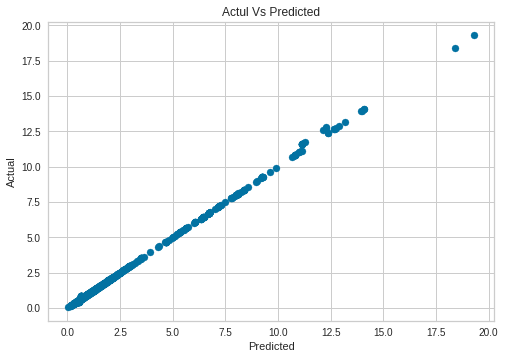

In [ ]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-1]     # Last column
actual = newPredictions.iloc[:,-2]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

## **Getting the Feature Importance Plot**

---



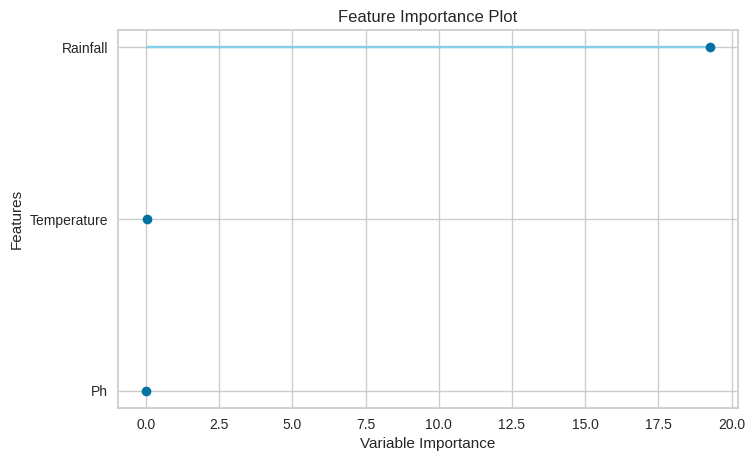

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
lrModel = create_model('lr', verbose=False)
plot_model(lrModel, plot='feature')